In [1]:
import json
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam, SGD, RMSprop

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
#Function for normalizing pixel values
def normalize(train, test):
  # convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [4]:
x_train, x_test = normalize(x_train, x_test)

y_train = keras.utils.to_categorical(y_train, 100)
y_test = keras.utils.to_categorical(y_test, 100)

In [5]:

model = Sequential()

size = 16

model.add(Conv2D(size*2, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(Conv2D(size*2, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(size*4, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(Conv2D(size*4, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(size*8, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(Conv2D(size*8, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(size*16))
model.add(Activation('elu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 16)        2320      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 32)        4

In [7]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
1563/1563 [==============================] - 9s 5ms/step - loss: 2.2589 - accuracy: 0.2082 - val_loss: 1.7626 - val_accuracy: 0.3677
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7523 - accuracy: 0.3546 - val_loss: 1.5543 - val_accuracy: 0.4425
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5856 - accuracy: 0.4255 - val_loss: 1.4970 - val_accuracy: 0.4521
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4727 - accuracy: 0.4682 - val_loss: 1.3150 - val_accuracy: 0.5219
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3932 - accuracy: 0.5004 - val_loss: 1.2433 - val_accuracy: 0.5517
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3356 - accuracy: 0.5249 - val_loss: 1.2183 - val_accuracy: 0.5605
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2890 - accuracy: 0.5407 - val_loss: 1.1753 - val_ac

1563/1563 [==============================] - 8s 5ms/step - loss: 0.7584 - accuracy: 0.7390 - val_loss: 0.6922 - val_accuracy: 0.7597
Epoch 58/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7530 - accuracy: 0.7410 - val_loss: 0.6781 - val_accuracy: 0.7660
Epoch 59/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7490 - accuracy: 0.7410 - val_loss: 0.6773 - val_accuracy: 0.7664
Epoch 60/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7514 - accuracy: 0.7418 - val_loss: 0.6657 - val_accuracy: 0.7717
Epoch 61/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7453 - accuracy: 0.7418 - val_loss: 0.6793 - val_accuracy: 0.7709
Epoch 62/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7428 - accuracy: 0.7431 - val_loss: 0.6745 - val_accuracy: 0.7658
Epoch 63/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7338 - accuracy: 0.7466 - val_loss: 0.6698 - val_accuracy

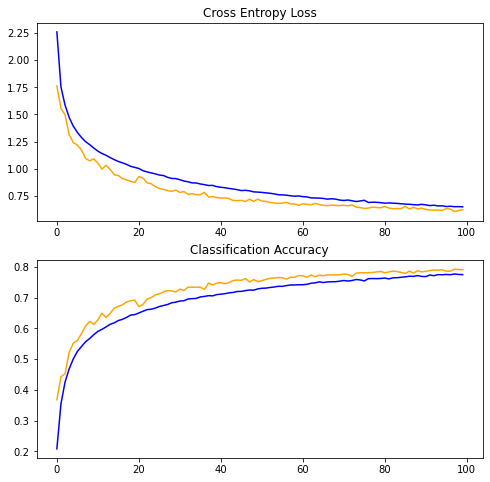

In [8]:
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [9]:
_, acc = model.evaluate(x_test, y_test, verbose=10)
print(acc)

0.8274999856948853
